# Time Series: 
Branch of Statistics that involves, the study of ordered, temporal data. Time Series anaysis can reveal unexpected trends and help the statistician to forecast trends ahead in the future. The objective of this notebook is to visualize time series data. 

In [1]:
# Import the libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Dataset: the "statsmodels" module comes with built-in datasets. The dataset we will be using is the "co2". 
# This dataset represents the Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.," 
# which collected CO2 samples from March 1958 to December 2001. 
# To view the dataset, access the location: "C:\Users\<UserName>\Anaconda3\lib\site-packages\statsmodels\datasets\"

# statsmodels 0.9.0 has an in-built method to load the data as a Pandas DataFrame viz...load_pandas()
# However this method isnt working as expected. We have to tk a detour to make the dataset loading possible. 
# The date column in the Dataset contains values of the form: "20010526". 
# We need to convert it to YYYY-MM-DD format
# Once this conversion has been done, convert the data to Pandas DataFrame

data = sm.datasets.co2.load()
print(type(data))                                     # <numpy.recarray> 

dateIndex = pd.DatetimeIndex(start=data.data['date'][0].decode('utf-8'),
                         periods=len(data.data), freq='W-SAT', yearfirst =True)
print(type(dateIndex))                                    # <pandas.core.indexes.datetimes.DatetimeIndex>..converts to "YYYY-MM-DD"  

df = pd.DataFrame(data.data['co2'], index=dateIndex, columns=['co2'])
print(type(df))                                       # <pandas.core.frame.DataFrame>
print(df.head())                                      # Print first few lines. 

# Observe carefully that we have set the date as the index of the pandas DataFrame. Index == Rows Label. 
# This is needed to transform the data into time-series specific...


<class 'statsmodels.datasets.utils.Dataset'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.frame.DataFrame'>
              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [3]:
# Observe that "dateIndex" consisting of dates have been set as the index of our pandas DataFrame.
# When working with time-series data in Python we should ensure that dates are used as an index, 
# so make sure to always check for that, which we can do by running the following
df.index


# The datetime64[ns] field confirms that our index is made up of date stamp objects while
# length=2284 and freq='W-SAT' tell us that, we have 2284 weekly date stamps starting on Saturday!!

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

# Mapping weekly data to monthly

In [4]:
# Weekly data can be very tricky to work with. A better strategy is to convert this weekly data to monthly averages.
# This is achieved easily by using the resample() which allows us to group the time-series into buckets (1-month). 
# Once the data is grouped into chunks of 1 month, apply the mean function 

df_new = df['co2'].resample('MS').mean()   # 'MS' means grouping data by months & ensuring that we consider start of each month
print(df_new.head())



1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64


# Slicing the data

In [5]:
# Since "dates" have been set as indexes, we can easily use them in slicing operations
# Lets say we are interested in acting only on years greater than equal to 1984
print(df_new['1984':])

# Lets say we are interested in acting only on dates between October 1995 and October 1996

print(df_new['1995-10-1':'1996-10-1'])

# Thus we can conclude that our data is properly indexed for working with temporal data. 

1984-01-01    343.675
1984-02-01    344.425
1984-03-01    345.175
1984-04-01    347.400
1984-05-01    347.350
1984-06-01    346.660
1984-07-01    345.200
1984-08-01    343.300
1984-09-01    341.120
1984-10-01    341.475
1984-11-01    342.850
1984-12-01    344.140
1985-01-01    344.925
1985-02-01    345.875
1985-03-01    347.440
1985-04-01    348.325
1985-05-01    348.825
1985-06-01    348.180
1985-07-01    346.450
1985-08-01    344.300
1985-09-01    343.000
1985-10-01    342.800
1985-11-01    344.220
1985-12-01    345.575
1986-01-01    346.250
1986-02-01    346.825
1986-03-01    347.740
1986-04-01    349.525
1986-05-01    350.080
1986-06-01    349.375
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-09-01

# Handling missing values

In [6]:
# Real world data is messy. It contains missing values. 
# Check for the total number of missing values

#print(df_new)                   # The way to access our data
print(df_new.isnull().sum())     # 5: i.e. there are in all 5 months with missing values in our time series. 


# We should "fill-in" the missing values. Since the missing values in our case is merely 5, we can substitute the gaps suitably.
# Use the pandas fill_na()
# We have 2 options to fill in the missing values:
# 1. Use the closest non-null value in the time series [bfill: uses the NEXT valid observation to fill the gap]
# 2. Use the rolling mean as a substitute for the missing values. 
df_new = df_new.fillna(method='bfill')

# Confirm the number of missing values
print(df_new.isnull().sum())    # 0: i.e. For all the months we have the values, in our time series. 


5
0


# Visualizing time series data
Time series data comprises of multiple components: 

1) Seasonality: whether the data displays a clear periodic pattern

2) Trend: Whether the data follows a consistent upward/ downward slope

3) Noise: Are there any outlier points/ missing values?


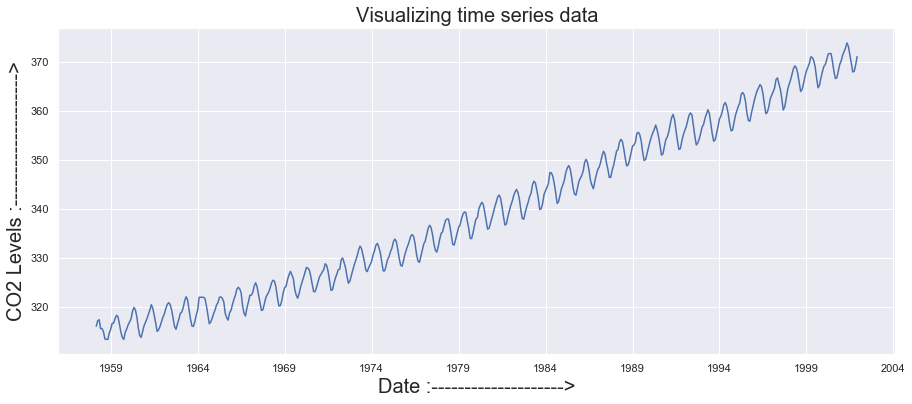

In [7]:
#  ****** Here we have used the pandas wrapper around the matplotlib API to display a plot of our dataset!!!!
# This is super convenient!

df_new.plot(figsize=(15, 6))  
plt.title("Visualizing time series data", fontsize=20)
plt.xlabel("Date :-------------------->", fontsize=20)
plt.ylabel("CO2 Levels :-------------------->", fontsize=20)
plt.show()                     


# Inference:

1. Time series shows an overall increasing upward TREND. 

2. Time series also shows SEASONALITY PATTERN. To confirm it further, we will use the statsmodels dedicated function called as the seasonal_decompose(), which decomposes the time series into its constituent components viz...seasonality and trend. 


# Time Series Decomposition:
As the name suggest the time series decomposition is used to separate or decompose a time series into seasonal/ trend and irregular components. This method could be used for forecasting, however the main objective is to get a better understanding of the time series. Time series published by the census bureau are the deseasonalised time series. 

Deaseasonalization of the time series is a must before making a judgement about any long term trend.

Time series decomposition ASSUMES that Y_t i.e. the actual time series value at time (t), is a function of 3 components: trend component, seasonal component and error component. 

### Decompositipon models could be: Additive / Multiplicative
### Additive model: 
Y_t = Trend_t  + Seasonal_t + Error_t

### Multiplicative Model:
y_t = Trend_t x Seasonal_t x Error_t


### NOTE: Trend is measured in the same units as of the item being forecasted. However the seasonal & irregular/error components are measured in relative terms with values above 1.00 indicating effects above the trend and values below 1.00 indicating values below the trend. 

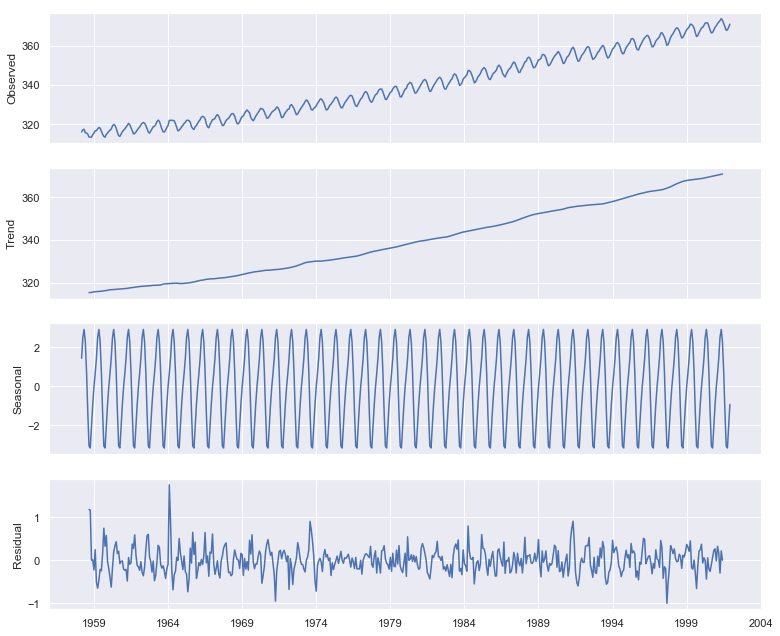

In [8]:
# PyLab is a module that belongs to the Python mathematics library Matplotlib. 
# PyLab combines the numerical module "numpy" with the graphical plotting module "pyplot".

from pylab import rcParams
rcParams['figure.figsize'] = 11,9


# Decomposition models are 
decomposition = sm.tsa.seasonal_decompose(df_new, model = 'additive')  # Using the additive model for time series decomposition.
fig = decomposition.plot()
plt.show()


## Inference: 

1. The trend is a clear cut upward trend. 

2. For infering seasonality divide the graph virtually into individual years and then see the graph pattern for each year. 
 We see that the same pattern is repeated every year. Thus our data has strong seasonality. However by just comparing the year-wise data graphs, we cannot infer the strength of the seasonality i.e. whether it is strong/ weak. Also sometimes the graphs can be misleading. 

Reference: https://stats.stackexchange.com/questions/153813/how-to-interpret-decomposition-plot-and-check-for-seasonality